# ALGERIAN FIRE FOREST EDA and BUILDING LINEAR REGRESSION MODEL

By - KUNAL KALKOTWAR

LinkedIn - https://www.linkedin.com/in/kunal-kalkotwar/
GitHub - https://github.com/Kkalkotwar

# Business (Project) Objective

1. To do the data exploration and perform EDA on dataset to get some basic insights.
2. To perform machine learning on Algerian forest Dataset.
3. To Perform Regression model

# Data Set Information

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.
The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.
Attribute Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

# Model Which we will be using

1. Linear regression
2. Ridge Regression
3. Lasso Regression
4. ElasticNet Regression

In [81]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

df = pd.read_csv("F:/My_Design/Data_Science/Data Science/Data Science Notes/Machine Learning/Projects/Algerian Fire Forest/Dataset/Algerian_forest_fires_dataset.csv", header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df2 = df
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# Basic Data Exploration and EDA

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


All the features are object which is not desirable, so we need to change the datatype first

In [6]:
# Checking for null values

null_data=df2.isnull().sum()
null_data

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
df2[df2['month'].isnull()].index.tolist()

[122]

In [8]:
df2.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [9]:
# Droping the unnecessary rows
df2.drop([122,123], inplace=True)

In [10]:
df2.reset_index(inplace=True)

In [11]:
df2

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [12]:
df2.drop(["index"], axis=1, inplace=True)

In [13]:
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [14]:
# Creating new column with name region 

df2.loc[:122, 'region'] = 'bejaia'
df2.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [15]:
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [16]:
df2.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [17]:
# Striping the columns so that extra spaces is can be removed

df2.columns = df2.columns.str.strip()
df2.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [18]:
df2['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [19]:
df2['Classes'] = df["Classes"].str.strip() # Striping the columns so that extra spaces is can be removed
df2["Classes"].unique()

array(['not fire', 'fire', nan], dtype=object)

In [20]:
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [21]:
df["Classes"].isna().sum()

1

There is one NA value in Class feature

In [22]:
df2[df2['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [23]:
df2['Classes'] = df2['Classes'].fillna(method='ffill') # Filling the nan value with Forward Fill

In [24]:
df2.iloc[165:166,:] 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,fire,Sidi-Bel Abbes


In [25]:
# We can see that in the same row there is "FIRE" in FWI column so we need to replace that with revelent value

df2['FWI'].iloc[165] # This is the position of the 'FIRE' word in 'FWI' Column, we need to replace that with revelent value.

'fire   '

In [26]:
df2['FWI'].iloc[165] = int(0)

In [27]:
df2.iloc[165:166,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,0,fire,Sidi-Bel Abbes


In [28]:
df2['DC'].iloc[165] = int(14.69)

In [29]:
df2[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df2[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [30]:
df2[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df2[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(7), int32(6), object(2)
memory usage: 23.0+ KB


In [32]:
df2['FWI'].iloc[165] = df2['FWI'].median() # 

In [33]:
df2.iloc[165:166,:] 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.0,12.5,10.4,4.2,fire,Sidi-Bel Abbes


In [34]:
df2.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

1. Hence, all the null values are remaoved and all the spaces are been removed
2. The data types of all the features were object, so they were changed according to our requirement and dataset

In [35]:
df2.head(10)  # Cleaned DATA

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,bejaia
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,bejaia
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,bejaia
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,bejaia
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,bejaia


In [36]:
# Droping the Year Column as this data is of same year

df2.drop(columns="year", inplace=True)

In [37]:
# Doing Categorical to Numerical conversion for "CLASSES" and "REGION" column

# Label-Encoding
le = LabelEncoder()
le

LabelEncoder()

In [38]:
le_columns = ['Classes','region']
df2[le_columns] = df2[le_columns].apply(le.fit_transform)


In [39]:
df2.head(10)

# For notfire - 1
# For fire - 0

# For bejaia - 1
# For Sidi-Bel Abbes - 0

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,1
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0,1
7,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0,1
8,9,6,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,1,1
9,10,6,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,1,1


# Discriptive Statistics analysis and some important visualization

In [40]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.285656,47.621476,6.9,13.125,33.10,68.150,220.4
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0


In [41]:
# Checking the covariance between the features

df2.cov()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,7.788167e+01,4.641920e-16,3.071308,-9.747689,1.165621,-1.980908,28.346758,53.654328,221.864359,6.548769,64.839034,23.004635,-0.884504,2.193033e-17
month,4.641920e-16,1.238683e+00,-0.238683,-0.627572,-0.129630,0.078601,0.248560,0.938477,6.767695,0.286626,1.356790,0.688477,-0.012346,0.000000e+00
Temperature,3.071308e+00,-2.386831e-01,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.100010,9.218043,23.512265,15.177785,-0.935168,-4.979424e-01
RH,-9.747689e+00,-6.275720e-01,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.104178,-42.920524,-73.700941,-63.542154,3.216117,3.030864e+00
Ws,1.165621e+00,-1.296296e-01,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.196973,0.178913,1.187799,0.645170,0.092862,2.489712e-01
Rain,-1.980908e+00,7.860082e-02,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.257604,-2.897687,-8.496825,-4.809061,0.376833,4.115226e-02
FFMC,2.834676e+01,2.485597e-01,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.017518,44.283138,120.090018,73.359635,-5.484349,-1.613992e+00
DMC,5.365433e+01,9.384774e-01,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.556983,34.831449,172.536341,80.452858,-3.588791,-1.184156e+00
DC,2.218644e+02,6.767695e+00,64.100010,-156.104178,10.196973,-28.257604,344.017518,515.556983,2267.805020,99.177570,637.146900,261.610137,-11.993743,1.945473e+00
ISI,6.548769e+00,2.866255e-01,9.218043,-42.920524,0.178913,-2.897687,44.283138,34.831449,99.177570,17.433281,37.714477,28.319011,-1.525363,-5.615226e-01


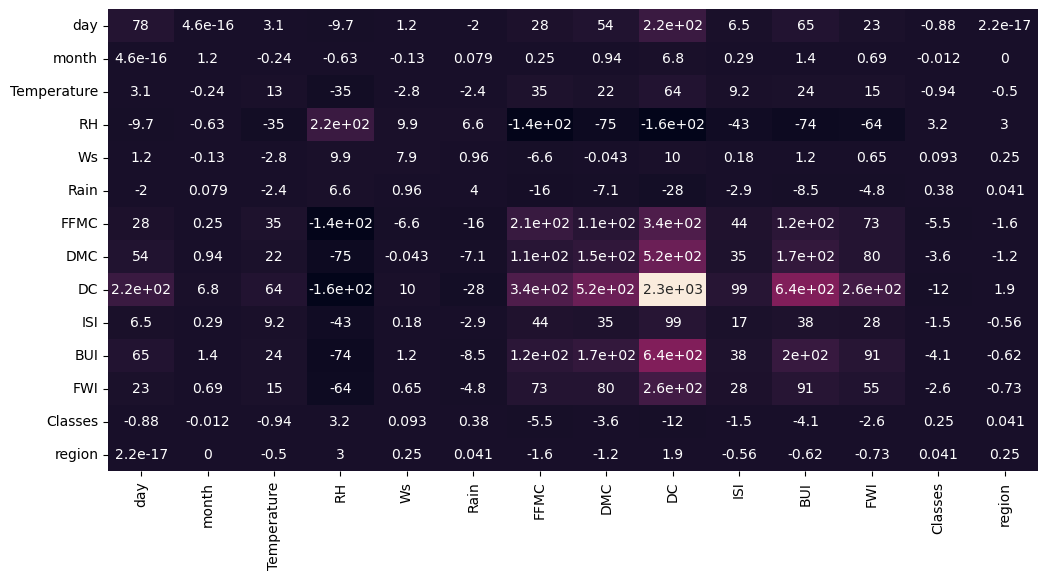

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(df2.cov(), annot=True, cbar=False )
plt.show()

In [43]:
# Checking for corelation between the features

df2.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527919,0.177727,0.517229,0.350960,-0.201784,-4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127690,0.061680,0.085822,0.083285,-0.022333,6.718556e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370415,0.607551,0.455504,0.562344,-0.518119,-2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220235,-0.690637,-0.348587,-0.574773,0.435023,4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076196,0.015248,0.029756,0.030910,0.066529,1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296778,-0.347105,-0.299171,-0.323831,0.379449,4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503851,0.739730,0.589652,0.688876,-0.770114,-2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875332,0.674499,0.982073,0.875791,-0.584188,-1.910937e-01
DC,5.279187e-01,1.276903e-01,0.370415,-0.220235,0.076196,-0.296778,0.503851,0.875332,1.000000,0.498794,0.941891,0.739625,-0.507058,8.153811e-02
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498794,1.000000,0.635891,0.913163,-0.735511,-2.684206e-01


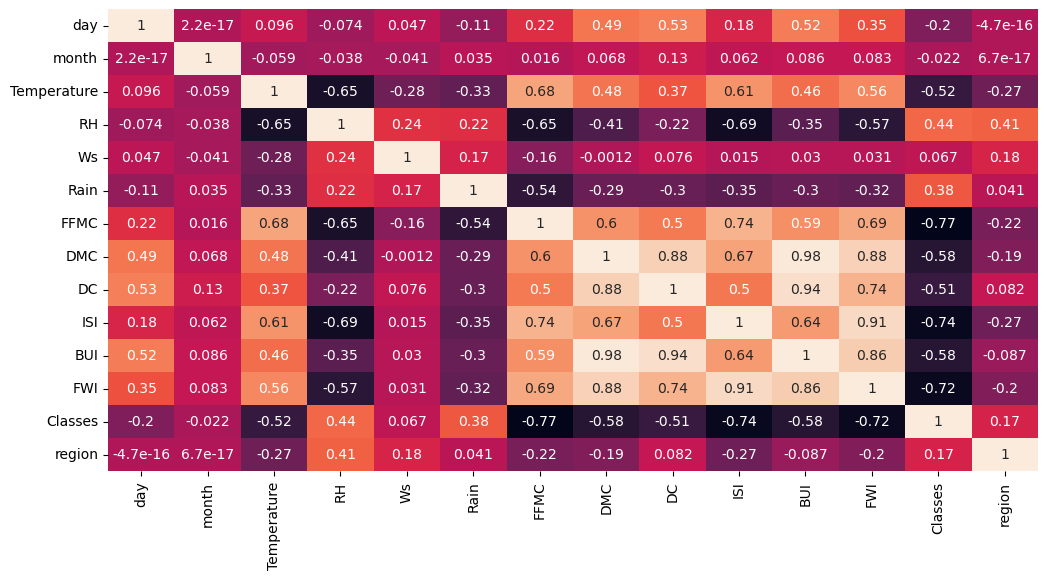

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(df2.corr(), annot=True, cbar=False )
plt.show()

Observations:

As we are keeping Temperature as output feature...,
1. Temperature feature has high correlation with FFMC, DMC, ISI, BUI, FWI
2. Temperature feature has less correlation with DC, Day
3. Temperature has Negative corelation with month, RH, Ws, Rain, Classes, region
4. RH has less corelation with Ws, Rain and high corelation with Classes and region
5. FFMC, DMC, ISI, DC, BUI, FWI has very high corelation with each other

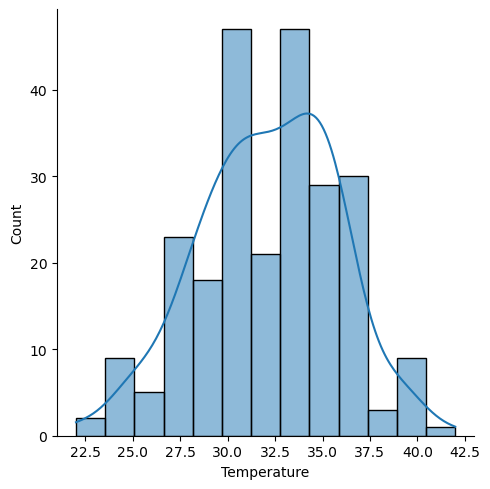

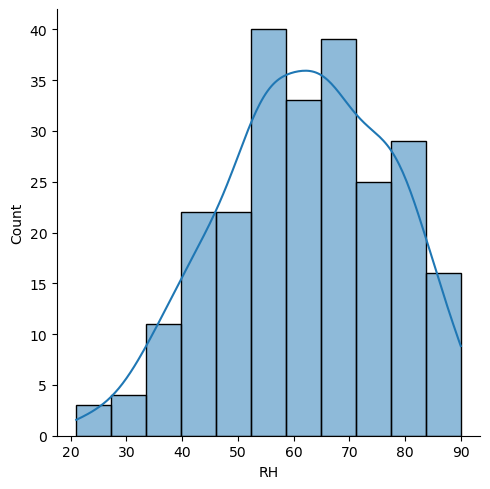

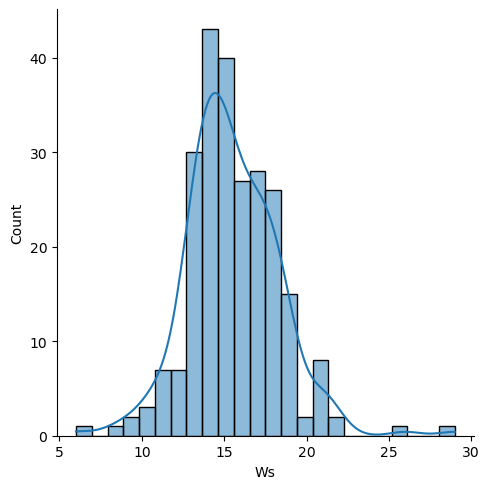

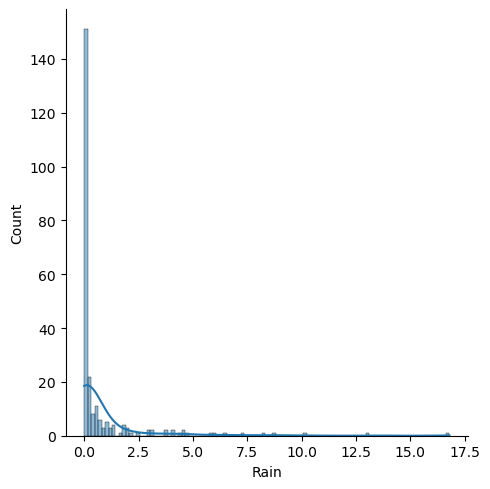

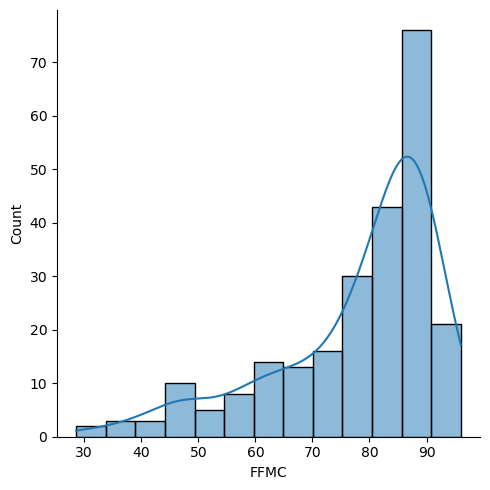

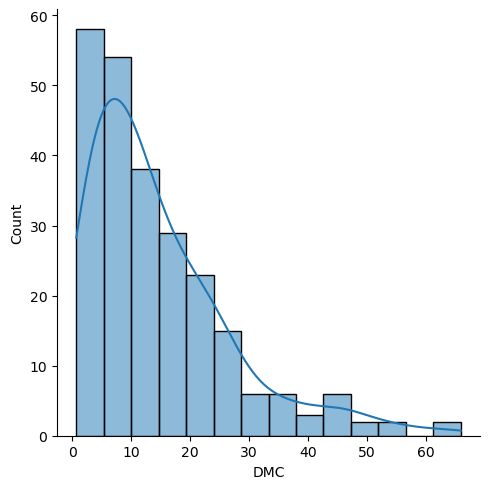

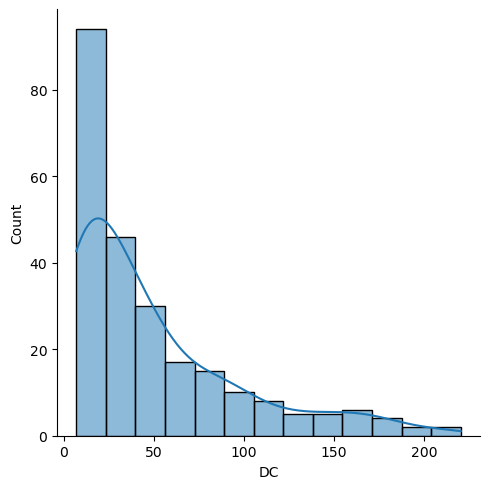

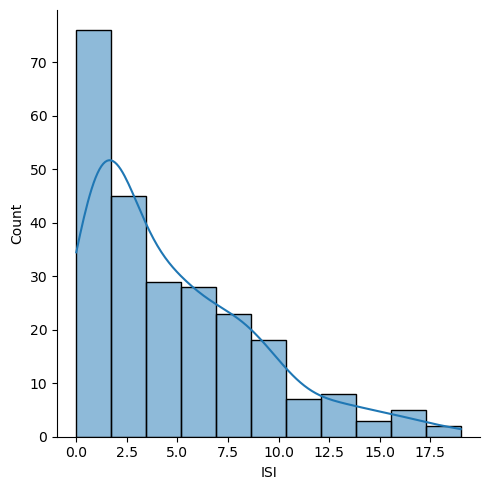

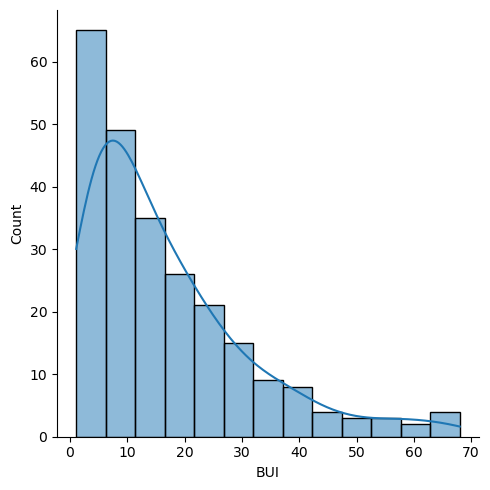

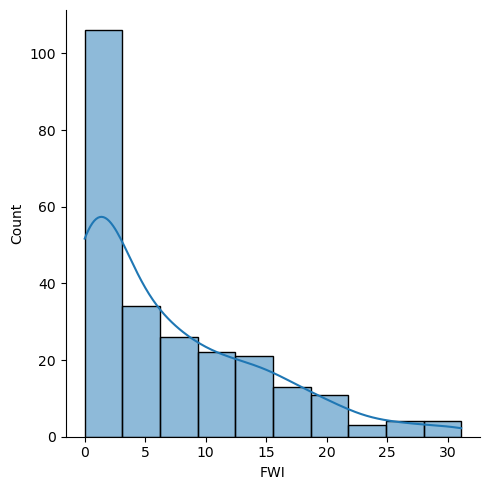

In [45]:
col = df2[['Temperature', 'RH', 'Ws', 'Rain','FFMC','DMC','DC','ISI','BUI','FWI']]
for i in col:
    sns.displot( df2[i], kde = True)

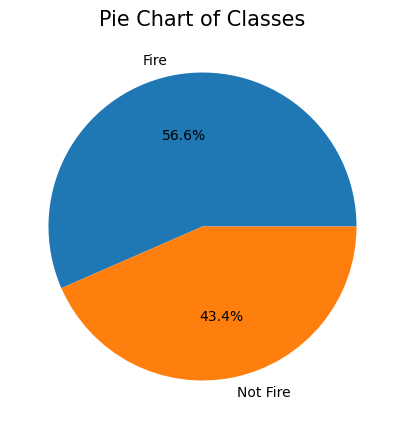

In [46]:
# Ploting Pie chart to get the percentage of fire and not fire

# Percentage of Fire and Not Fire
percentage = df2['Classes'].value_counts(normalize=True)*100
percentage
Class_labels = ['Fire','Not Fire']

plt.figure(figsize=(10,5))
plt.pie(percentage, labels=Class_labels, autopct="%1.1f%%", )
plt.title("Pie Chart of Classes", fontsize = 15)
plt.show()

Conclussion:
Almost 56% of region was affected by fire and 46% of region was not affected 

# Let's Check for Outliers

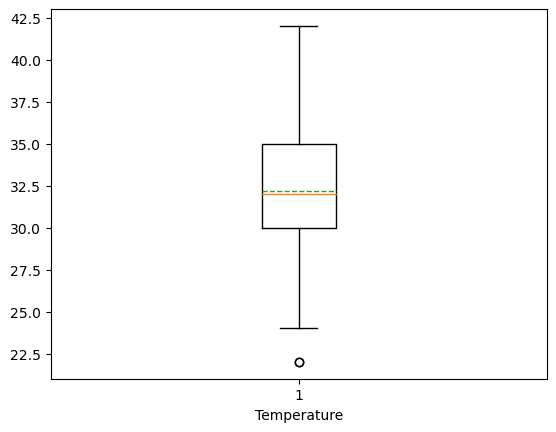

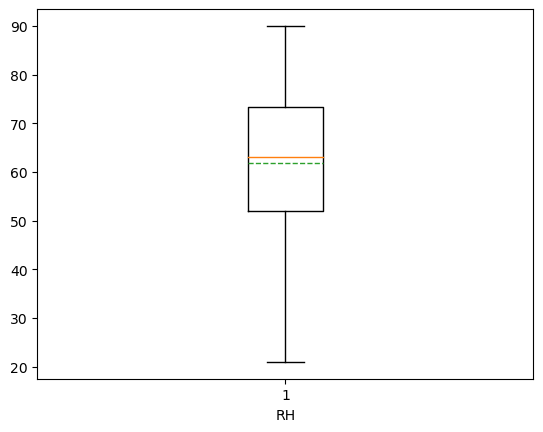

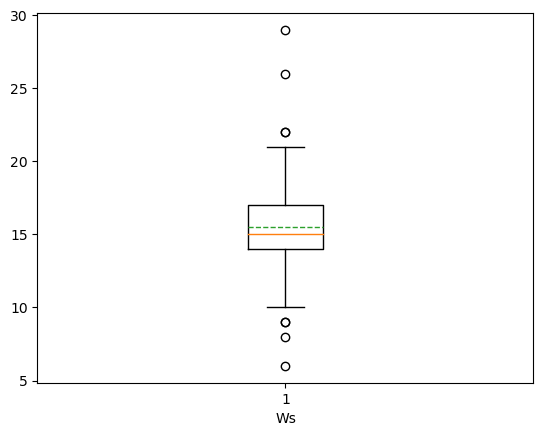

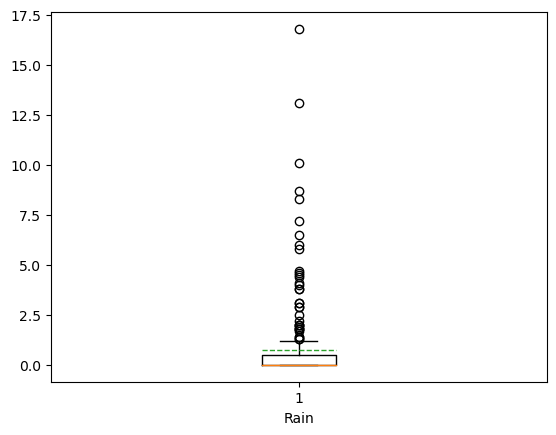

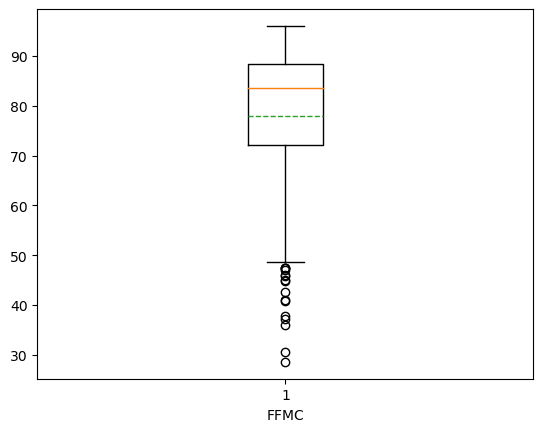

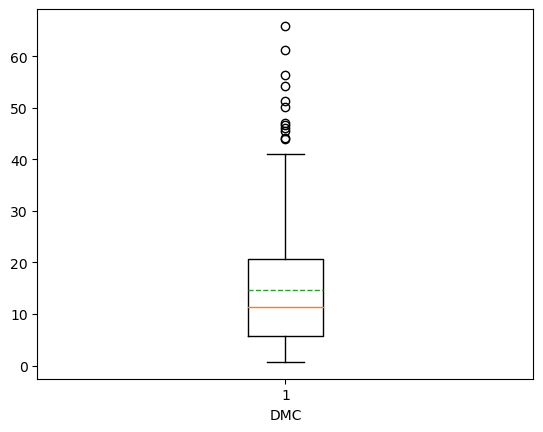

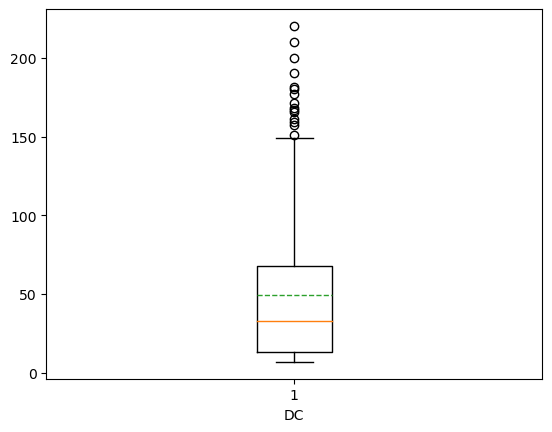

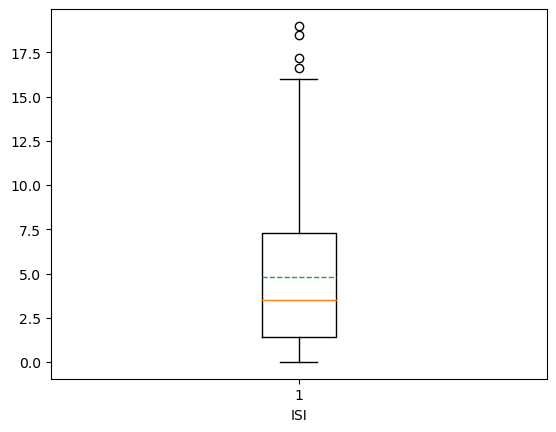

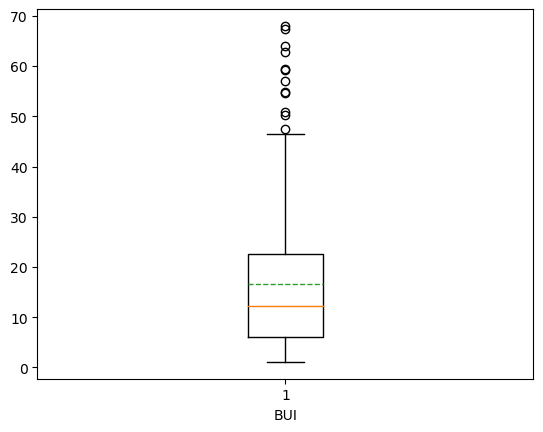

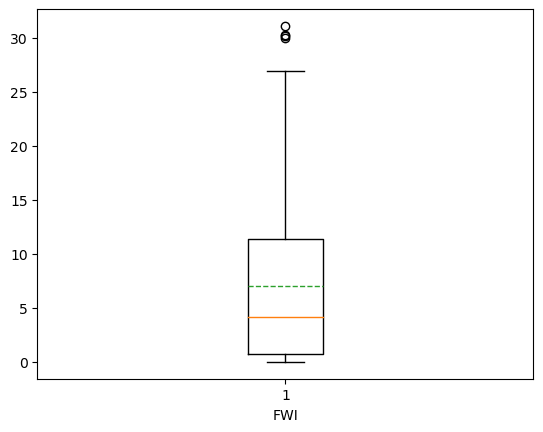

In [47]:
# Box Plot method
for i in col:
    plt.figure()          # plots figure for each iteration
    plt.boxplot(df2[i],meanline=True, showmeans=True)
    plt.xlabel(i)

In [48]:
# Using IOR Technique

Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
IQR

Temperature     5.000
RH             21.250
Ws              3.000
Rain            0.500
FFMC           16.225
DMC            14.950
DC             55.025
ISI             5.900
BUI            16.525
FWI            10.675
dtype: float64

In [49]:
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)

print(lower_fence)
print(upper_fence)


Temperature    22.5000
RH             20.1250
Ws              9.5000
Rain           -0.7500
FFMC           47.7375
DMC           -16.6250
DC            -69.4125
ISI            -7.4500
BUI           -18.7875
FWI           -15.3125
dtype: float64
Temperature     42.5000
RH             105.1250
Ws              21.5000
Rain             1.2500
FFMC           112.6375
DMC             43.1750
DC             150.6875
ISI             16.1500
BUI             47.3125
FWI             27.3875
dtype: float64


In [50]:
df3 = df2[~((df2 < lower_fence) | (df2 > upper_fence)).any(axis = 1)]
df3

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,1
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0,1
7,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,23,9,35,56,14,0.0,89.0,29.4,115.6,7.5,36.0,15.2,0,0
238,25,9,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,1,0
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,0


In [51]:
df3.shape

(176, 14)

In [52]:
df2.shape

(244, 14)

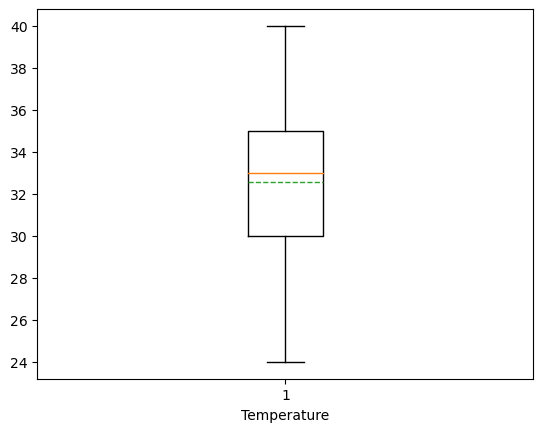

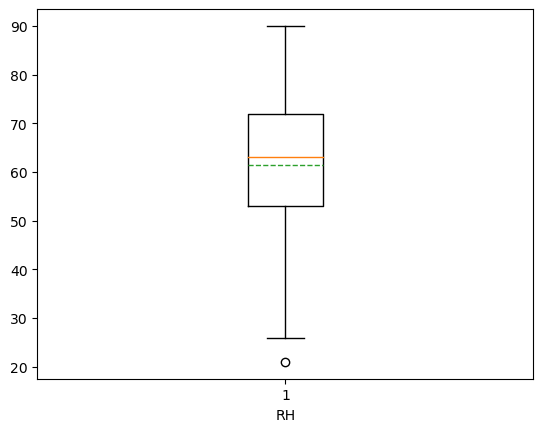

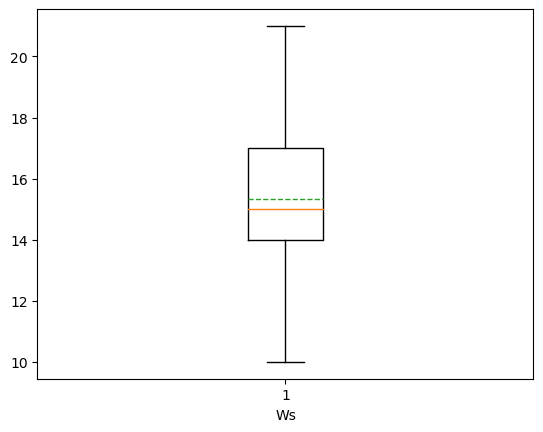

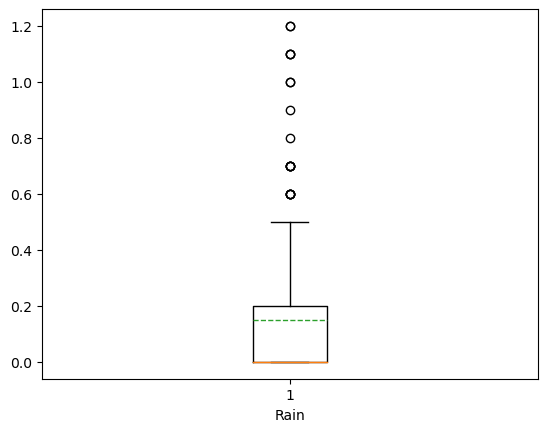

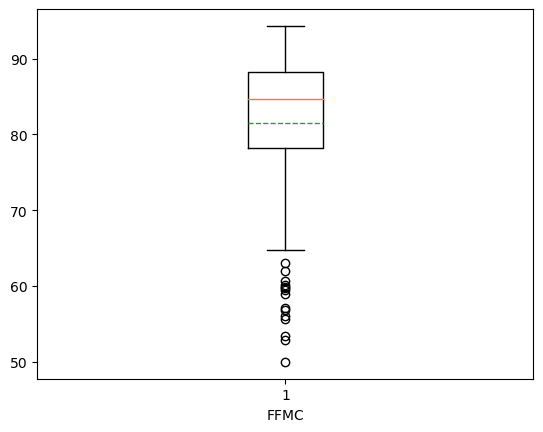

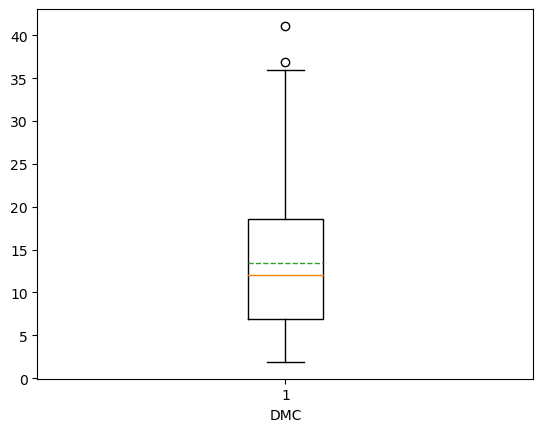

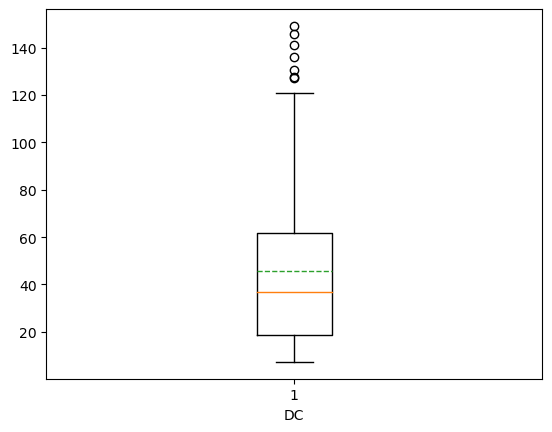

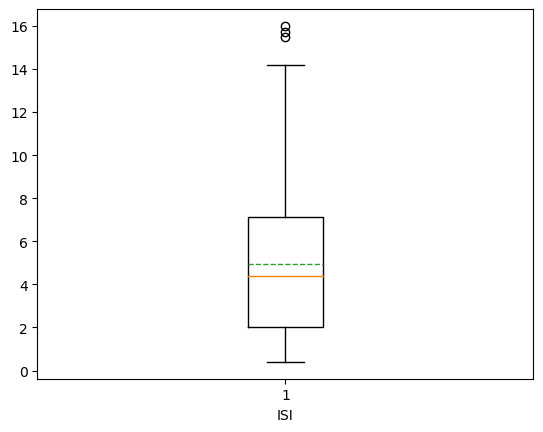

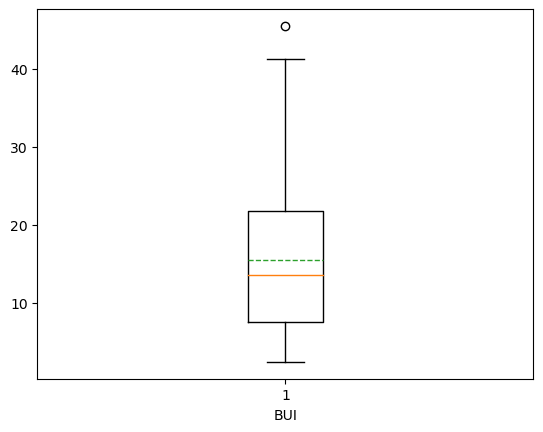

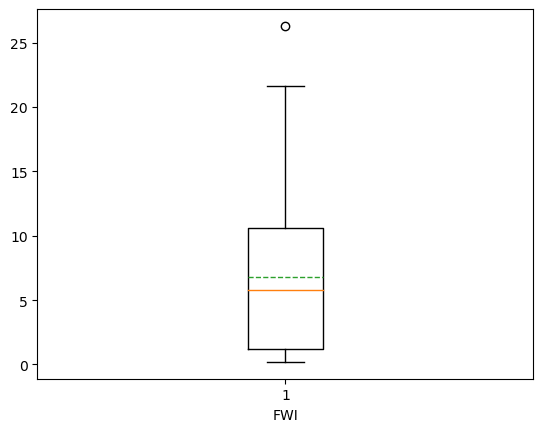

In [53]:
# Checking for outliers again using Box Plot method after IQR trestment
for i in col:
    plt.figure()          # plots figure for each iteration
    plt.boxplot(df3[i],meanline=True, showmeans=True)
    plt.xlabel(i)

# MODEL BUILDING

In [54]:
df3.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

# Dependent and Independent Variable

In [55]:
# Selecting the X values
X = df3.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12,13]]
X

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1
5,6,6,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,1
6,7,6,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0,1
7,8,6,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,23,9,56,14,0.0,89.0,29.4,115.6,7.5,36.0,15.2,0,0
238,25,9,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,1,0
239,26,9,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,0
242,29,9,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,0


In [56]:
# Selecting the Y values
Y = df3.iloc[:,2]
Y

0      29
4      27
5      31
6      33
7      30
       ..
236    35
238    28
239    30
242    24
243    24
Name: Temperature, Length: 176, dtype: int32

In [243]:
# Spliting the data into Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state= 20)

In [244]:
X_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
155,4,7,58,18,0.0,88.0,13.6,36.8,8.0,14.1,9.9,0,0
216,3,9,75,16,0.0,82.2,4.4,24.3,3.3,6.0,2.5,0,0
195,13,8,34,16,0.2,88.3,16.9,45.1,7.5,17.5,10.5,0,0
231,18,9,33,13,0.1,90.6,25.8,77.8,9.0,28.2,15.4,0,0
175,24,7,63,17,1.1,72.8,20.9,56.6,1.6,21.7,2.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,19,8,66,15,0.1,82.7,32.7,96.8,3.3,35.5,7.7,0,0
184,2,8,34,14,0.0,93.3,10.8,21.4,13.8,10.6,13.5,0,0
220,7,9,62,15,0.0,83.3,5.8,17.7,3.8,6.4,3.2,0,0
21,22,6,67,17,0.1,79.1,7.0,39.5,2.4,9.7,2.3,1,1


In [245]:
X_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
148,27,6,55,15,0.0,89.1,20.9,43.3,8.0,20.8,12.0,0,0
243,30,9,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,0
54,25,7,65,18,0.0,84.3,12.5,88.7,4.8,18.5,7.3,0,1
149,28,6,37,13,0.0,92.5,27.2,52.4,11.7,27.1,18.4,0,0
118,27,9,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,0,1
80,20,8,68,19,0.0,88.3,25.9,130.6,8.8,34.7,16.8,0,1
191,9,8,43,12,0.0,91.7,16.5,30.9,9.6,16.4,12.7,0,0
144,23,6,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,1,0
168,17,7,81,17,0.0,84.6,21.1,42.3,4.7,20.9,7.7,0,0
224,11,9,73,14,0.0,79.2,6.5,16.6,2.1,6.6,1.2,1,0


In [246]:
print('X_Train Size = ', format(X_train.shape)) # Printing the size of the X Train Data
print('X_Test Size = ', format(X_test.shape)) # Printing the size of the X Test Data

X_Train Size =  (123, 13)
X_Test Size =  (53, 13)


# Feature Scaling

In [247]:
# Standardizing the Data 

std_scalar = StandardScaler()

In [ ]:
X_train = std_scalar.fit_transform(X_train)
X_test = std_scalar.transform(X_test)

In [ ]:
X_train

In [248]:
X_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
148,27,6,55,15,0.0,89.1,20.9,43.3,8.0,20.8,12.0,0,0
243,30,9,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,0
54,25,7,65,18,0.0,84.3,12.5,88.7,4.8,18.5,7.3,0,1
149,28,6,37,13,0.0,92.5,27.2,52.4,11.7,27.1,18.4,0,0
118,27,9,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,0,1
80,20,8,68,19,0.0,88.3,25.9,130.6,8.8,34.7,16.8,0,1
191,9,8,43,12,0.0,91.7,16.5,30.9,9.6,16.4,12.7,0,0
144,23,6,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,1,0
168,17,7,81,17,0.0,84.6,21.1,42.3,4.7,20.9,7.7,0,0
224,11,9,73,14,0.0,79.2,6.5,16.6,2.1,6.6,1.2,1,0


# 1. LINEAR REGRESSION MODEL

In [268]:
le = LinearRegression() # Initializing the linear regression model

In [269]:
# Model Training

L_reg = le.fit(X_train, Y_train)
L_reg

LinearRegression()

In [270]:
# Checking For the coefficient of individual features
coeff = L_reg.coef_
X_col = X.columns

for c, val in zip(X_col, coeff):
    print('{} = {}'.format(c,val))

day = -0.08161375006955639
month = -0.29056779974625563
RH = -0.0637233862242978
Ws = -0.2238690032970242
Rain = 3.5141907608001848
FFMC = 0.13678724963615738
DMC = 0.3539662648599129
DC = 0.045203952285047165
ISI = 0.2015009175422835
BUI = -0.28473864389364717
FWI = -0.12759845274140988
Classes = 0.24039412107649577
region = 0.33094455135334816


In [271]:
# Checking for the intercept

L_reg.intercept_

28.666823370791818

In [272]:
# Prediction 

L_predict = L_reg.predict(X_test)
L_predict

array([33.55825616, 27.21817648, 31.48519222, 36.31289129, 31.01715187,
       33.35304889, 35.60605456, 32.07160758, 31.24457294, 29.88385804,
       33.17984004, 30.36501177, 34.48909996, 34.76614799, 27.87491589,
       32.49224255, 32.21511551, 32.66802399, 32.97313103, 28.84495556,
       30.25429264, 29.97993851, 30.70253726, 30.77571317, 32.09062337,
       29.56312815, 29.55105219, 31.84388696, 27.63279333, 27.34050577,
       32.71996307, 30.90923911, 34.57568577, 34.30578796, 31.2702351 ,
       32.19625706, 28.23321156, 34.74013488, 29.9649818 , 34.93956494,
       33.68699689, 34.84570806, 32.8285606 , 27.52280806, 34.38242378,
       35.46183515, 33.4581433 , 28.91523714, 33.2187752 , 34.79864248,
       30.76706205, 34.07383287, 32.55927169])

# Checking the Assumptions of Linear Regression

1. Linearity between test data and predicted data

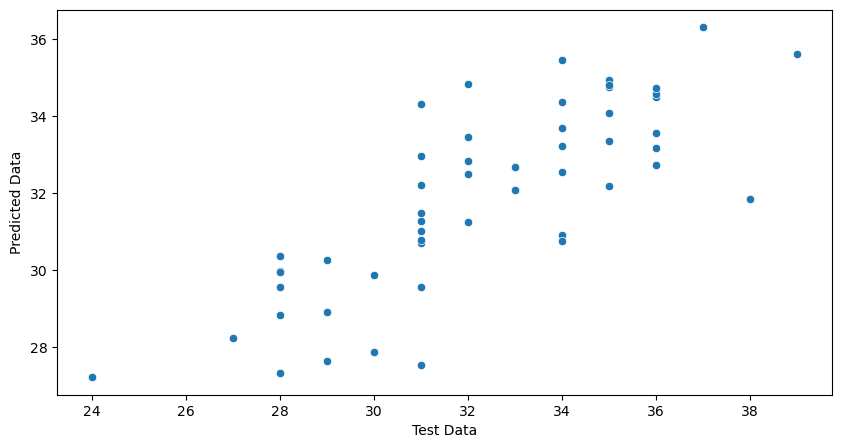

In [273]:
plt.figure(figsize=(10,5))
sns.scatterplot(Y_test, L_predict)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

As we can see in above scatter plot that there is linearity between Test data and Predicted Data

2. Resigual should have Gaussian Distribution (Should be Normally Distributed) 

<Figure size 1000x500 with 0 Axes>

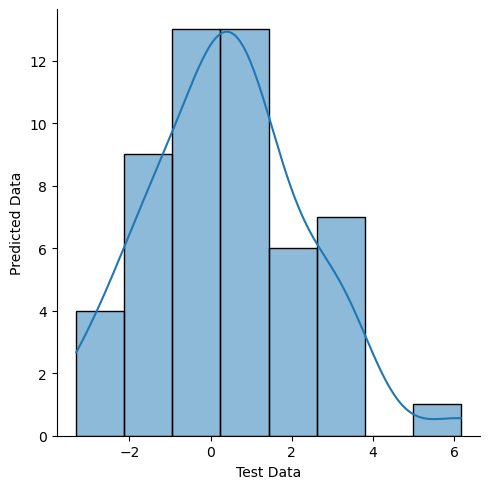

In [274]:
L_residual = Y_test - L_predict
plt.figure(figsize=(10,5))
sns.displot(L_residual, kde = True)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

Distribution is almost normal distribution

3. There should be even distribution between residual and Predicted Data

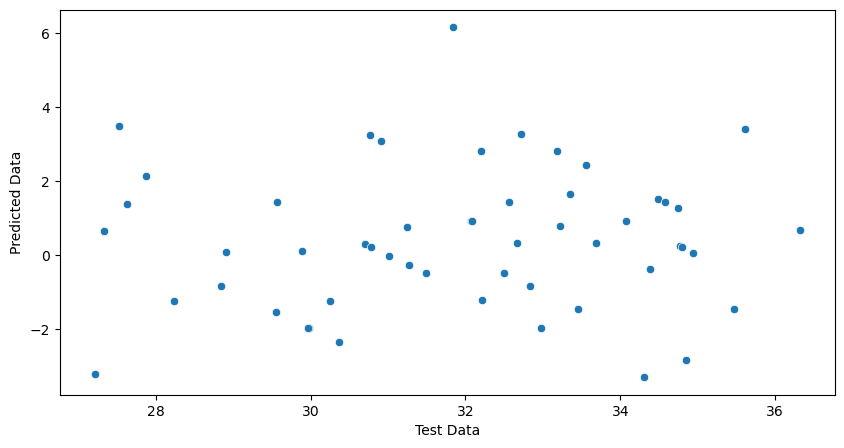

In [275]:
plt.figure(figsize=(10,5))
sns.scatterplot(L_predict, L_residual)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

# Performance Metrics and Accuracy check

In [288]:
# Checking the Training and Test Accuracy

print('Training score : ', le.score(X_train,Y_train)*100)
print('Test Score : ', le.score(X_test,Y_test)*100)

Training score :  58.736686453877965
Test Score :  61.54122234555632


In [277]:
# Calculating the Errors
MSE = mean_squared_error(Y_test,L_predict)
MAE = mean_absolute_error(Y_test,L_predict)
RMSE = np.sqrt(MSE)
print('MSE = {}'.format(MSE))
print('MAE = {}'.format(MAE))
print('RMSE = {}'.format(RMSE))

MSE = 3.74100263663232
MAE = 1.5012485109130114
RMSE = 1.9341671687401583


In [278]:
# R Squared / # Adjusted R Square

L_R_squared = r2_score(Y_test,L_predict)
L_AdjR_score = 1-(((1-L_R_squared)*(len(Y_test)-1))/(len(Y_test)-X_test.shape[1]-1))
print('R Square  = {}%'.format(L_R_squared*100))
print("Adjusted R Square = {}%".format(L_AdjR_score*100))

R Square  = 61.54122234555632%
Adjusted R Square = 48.721629794075106%


# 2. Ridge Regression

In [294]:
Re = Ridge() # Initializing the Ridge Regression model
Re

Ridge()

In [295]:
Ridge_reg = Re.fit(X_train,Y_train) # Model Training
Ridge_reg

Ridge()

In [313]:
# Checking For the coefficient of individual features
Rid_coeff = Ridge_reg.coef_
X_col = X.columns

for c, val in zip(X_col, Rid_coeff):
    print('{} = {}'.format(c,val))

day = -0.0800049460986839
month = -0.27588257566400426
RH = -0.07316382516064374
Ws = -0.21327612635769533
Rain = 2.7200005347250618
FFMC = 0.11023805714872123
DMC = 0.33158742313579703
DC = 0.03996315050718961
ISI = 0.1968893793695081
BUI = -0.24341022622945221
FWI = -0.13850382196474634
Classes = 0.12513395552001272
region = 0.30870764534856404


In [297]:
# Checking for Intercept
Ridge_reg.intercept_

31.292704241981788

In [300]:
# Predicting the values
Rid_predict = Re.predict(X_test)
Rid_predict

array([33.58705188, 27.53421173, 31.48903569, 36.38660469, 31.00714468,
       33.26761549, 35.61433659, 31.77518709, 31.2341806 , 29.9183319 ,
       33.13620331, 30.30327831, 34.55732184, 34.74929922, 27.97666884,
       32.30685276, 32.09561036, 32.61138356, 32.93040823, 29.05494962,
       29.95517763, 30.09549772, 30.6946734 , 30.78413654, 32.14408256,
       29.58662145, 29.63047897, 32.06259629, 27.69135222, 27.54232472,
       32.64719676, 30.8951651 , 34.6690469 , 34.39093002, 31.33454654,
       32.11935144, 28.54857367, 34.66754   , 30.0656975 , 34.87974748,
       33.70568742, 34.85240323, 32.77920594, 27.88419372, 34.45164357,
       35.45719967, 33.39679459, 28.89462134, 33.29201595, 34.72021678,
       30.62224756, 34.11306594, 32.5772777 ])

# Assumptions 

1. Linearity between test data and predicted data

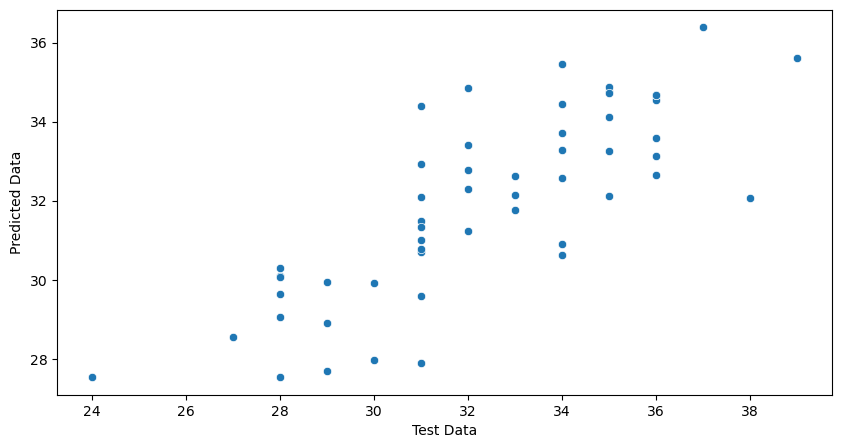

In [301]:
plt.figure(figsize=(10,5))
sns.scatterplot(Y_test, Rid_predict)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

2. Resigual should have Gaussian Distribution (Should be Normally Distributed) 

<Figure size 1000x500 with 0 Axes>

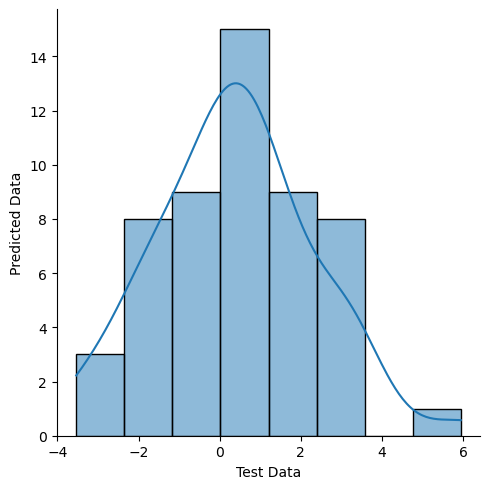

In [302]:
Rid_residual = Y_test - Rid_predict
plt.figure(figsize=(10,5))
sns.displot(Rid_residual, kde = True)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

3. There should be even distribution between residual and Predicted Data

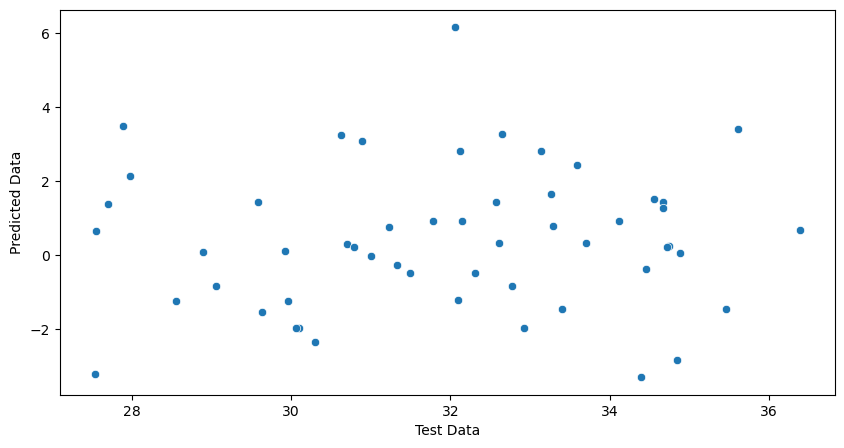

In [303]:
plt.figure(figsize=(10,5))
sns.scatterplot(Rid_predict, L_residual)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

# Performance Metrics and Accuracy check

In [307]:
# Checking the Training and Test Accuracy

print('Training score : ', Re.score(X_train,Y_train)*100)
print('Test Score : ', Re.score(X_test,Y_test)*100)

Training score :  58.56950363762905
Test Score :  61.562121026133184


In [305]:
# Calculating the Errors
Rid_MSE = mean_squared_error(Y_test,Rid_predict)
Rid_MAE = mean_absolute_error(Y_test,Rid_predict)
Rid_RMSE = np.sqrt(MSE)
print('Rid_MSE = {}'.format(Rid_MSE))
print('Rid_MAE = {}'.format(Rid_MAE))
print('Rid_RMSE = {}'.format(Rid_RMSE))

Rid_MSE = 3.738969758212661
Rid_MAE = 1.5032508330011864
Rid_RMSE = 1.9341671687401583


In [308]:
# R Squared / # Adjusted R Square

Rid_R_squared = r2_score(Y_test,Rid_predict)
Rid_AdjR_score = 1-(((1-Rid_R_squared)*(len(Y_test)-1))/(len(Y_test)-X_test.shape[1]-1))
print('R Square  = {}%'.format(Rid_R_squared*100))
print("Adjusted R Square = {}%".format(Rid_AdjR_score*100))

R Square  = 61.562121026133184%
Adjusted R Square = 48.74949470151092%


# 3. LASSO REGRESSION

In [310]:
La = Lasso() # Initiallizing the lasso model
La

Lasso()

In [312]:
Lasso_reg = La.fit(X_train,Y_train) # Model Training
Lasso_reg

Lasso()

In [314]:
# Checking For the coefficient of individual features
Lasso_coeff = Lasso_reg.coef_
X_col = X.columns

for c, val in zip(X_col, Lasso_coeff):
    print('{} = {}'.format(c,val))

day = -0.03363194436813796
month = -0.0
RH = -0.1084774505652015
Ws = -0.0
Rain = 0.0
FFMC = 0.025946660951809638
DMC = 0.10128950751223095
DC = 0.0068088328766402586
ISI = 0.0
BUI = 0.0
FWI = 0.0
Classes = -0.0
region = -0.0


In [315]:
Lasso_reg.intercept_

35.87306936829465

In [316]:
# Predicting the values

Lasso_predict = La.predict(X_test)
Lasso_predict

array([33.72236775, 30.16501035, 32.03860231, 36.42963284, 31.03936683,
       33.62768582, 35.16683011, 31.39014717, 31.13496257, 30.41064806,
       33.96717759, 30.36945053, 34.44261152, 34.21732494, 28.60274846,
       32.62287421, 33.08349875, 31.73398278, 32.32298952, 30.89891808,
       29.58513802, 30.67310658, 30.71421153, 30.27106326, 32.86475046,
       30.27070666, 29.93597108, 32.74740013, 28.14206266, 28.1682309 ,
       32.59936171, 31.14107388, 34.23120955, 35.34897098, 31.90568496,
       31.5710469 , 29.43404353, 33.75026864, 31.1555815 , 34.13805926,
       34.25955746, 34.46242679, 32.29798449, 29.39141382, 34.46013912,
       35.38164082, 32.45054027, 30.44761191, 33.46478898, 33.6979592 ,
       30.00741427, 33.01513506, 33.07999654])

# Assumptions

1. Linearity between Y_test and L_predict

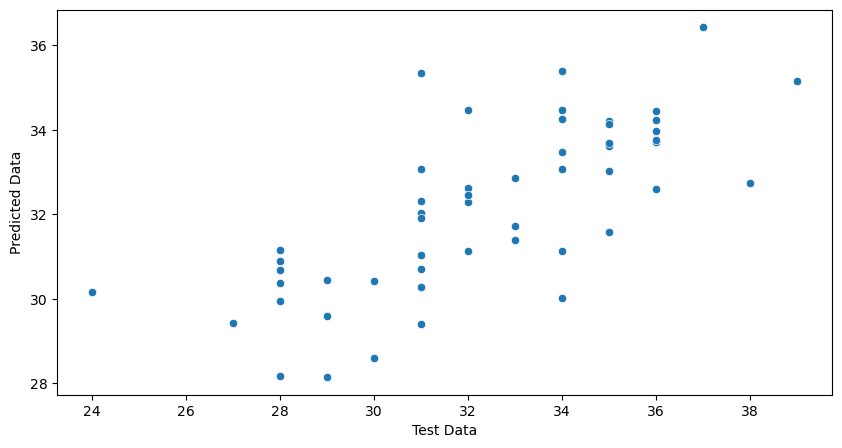

In [317]:
plt.figure(figsize=(10,5))
sns.scatterplot(Y_test, Lasso_predict)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

2. Resigual should have Gaussian Distribution (Should be Normally Distributed) 

<Figure size 1000x500 with 0 Axes>

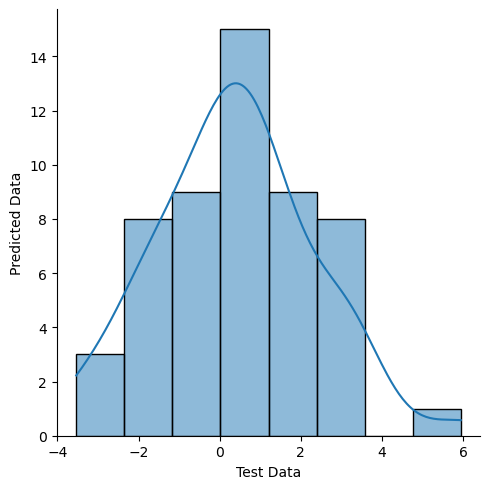

In [318]:
Lasso_residual = Y_test - Lasso_predict
plt.figure(figsize=(10,5))
sns.displot(Rid_residual, kde = True)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

3. There should be even distribution between residual and Predicted Data

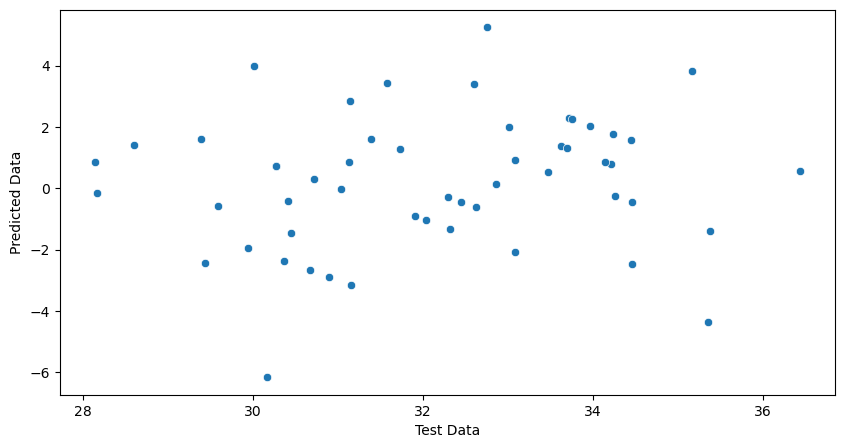

In [319]:
plt.figure(figsize=(10,5))
sns.scatterplot(Lasso_predict, Lasso_residual )
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

# Performance Metrics and Accuracy check

In [320]:
# Checking the Training and Test Accuracy

print('Training score : ', La.score(X_train,Y_train)*100)
print('Test Score : ', La.score(X_test,Y_test)*100)

Training score :  52.33677176185303
Test Score :  51.77142786711103


In [321]:
# Calculating the Errors
Lasso_MSE = mean_squared_error(Y_test,Lasso_predict)
Lasso_MAE = mean_absolute_error(Y_test,Lasso_predict)
Lasso_RMSE = np.sqrt(MSE)
print('Lasso_MSE = {}'.format(Lasso_MSE))
print('Lasso_MAE = {}'.format(Lasso_MAE))
print('Lasso_RMSE = {}'.format(Lasso_RMSE))

Lasso_MSE = 4.691340352292836
Lasso_MAE = 1.7053696789575115
Lasso_RMSE = 1.9341671687401583


In [323]:
# R Squared / # Adjusted R Square

Lasso_R_squared = r2_score(Y_test,Lasso_predict)
Lasso_AdjR_score = 1-(((1-Lasso_R_squared)*(len(Y_test)-1))/(len(Y_test)-X_test.shape[1]-1))
print('R Square  = {}%'.format(Lasso_R_squared*100))
print("Adjusted R Square = {}%".format(Lasso_AdjR_score*100))

R Square  = 51.77142786711103%
Adjusted R Square = 35.69523715614804%


# 4. ELASTIC NET REGRESSION

In [324]:
en = ElasticNet() # Initializing the model
en

ElasticNet()

In [332]:
Elastic_reg = en.fit(X_train,Y_train) # Training the model
Elastic_reg

ElasticNet()

In [333]:
# Checking For the coefficient of individual features
en_coeff = Elastic_reg.coef_
X_col = X.columns

for c, val in zip(X_col, en_coeff):
    print('{} = {}'.format(c,val))

day = -0.04890429981805146
month = -0.0
RH = -0.10522675544547322
Ws = -0.06149539995983646
Rain = 0.0
FFMC = 0.026607727094297318
DMC = 0.11678868717337197
DC = 0.006293847236316877
ISI = 0.0
BUI = 0.0
FWI = -0.0
Classes = -0.0
region = 0.0


In [334]:
Elastic_reg.intercept_

36.60282874344756

In [335]:
Elastic_predict = en.predict(X_test)
Elastic_predict

array([33.65666573, 29.81710193, 31.69471918, 36.50834284, 31.0673425 ,
       33.49717653, 35.46141655, 31.12977797, 31.18415141, 30.49332902,
       33.57695546, 30.45611619, 34.57755401, 34.42476288, 28.38146279,
       32.37359963, 32.6657903 , 31.9012019 , 32.35709577, 30.73391446,
       29.58825098, 30.4783233 , 30.76349726, 30.41974079, 32.65006405,
       30.15904362, 29.72284414, 32.88453821, 28.25385954, 28.18721953,
       32.36394181, 30.97470418, 34.51708441, 35.08213084, 31.65445714,
       31.73268054, 29.43584008, 33.8789136 , 31.05676653, 34.30775208,
       33.9945967 , 34.49096669, 32.43360014, 29.28341372, 34.56198916,
       35.40016831, 32.63992305, 29.97628586, 33.57527204, 34.02052334,
       30.06476811, 33.32432866, 32.91088882])

# Assumptions

1. Linearity between Y_test and L_predict

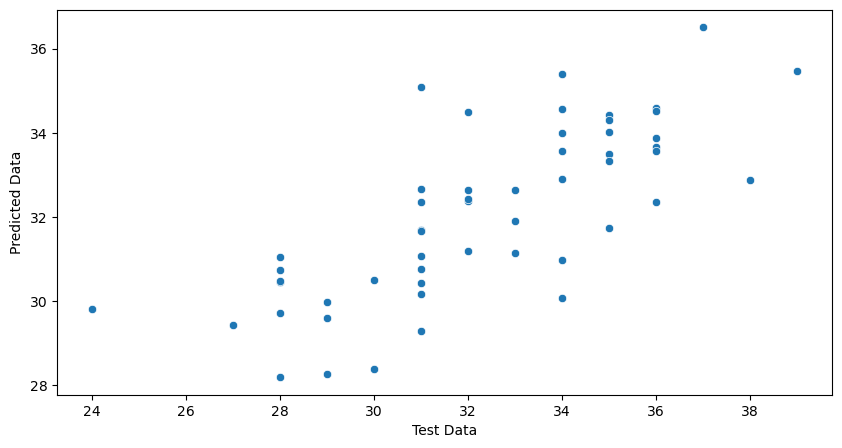

In [336]:
plt.figure(figsize=(10,5))
sns.scatterplot(Y_test,Elastic_predict )
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

2. Resigual should have Gaussian Distribution (Should be Normally Distributed) 

<Figure size 1000x500 with 0 Axes>

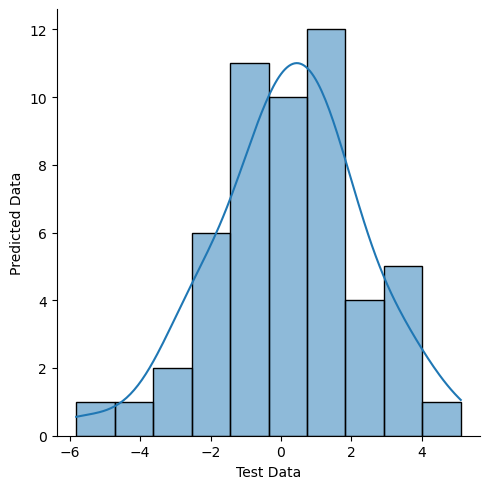

In [337]:
Elastic_residual = Y_test - Elastic_predict
plt.figure(figsize=(10,5))
sns.displot(Elastic_residual, kde = True)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

3. There should be even distribution between residual and Predicted Data

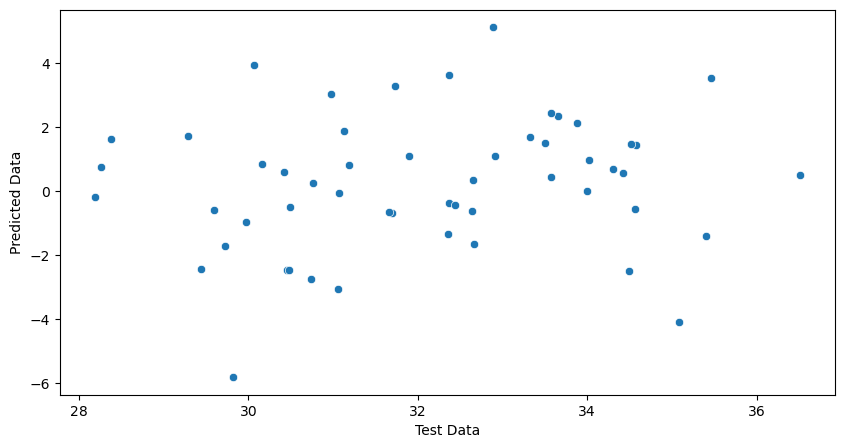

In [338]:
plt.figure(figsize=(10,5))
sns.scatterplot(Elastic_predict, Elastic_residual )
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

# Performance Metrics and Accuracy check

In [339]:
# Checking the Training and Test Accuracy

print('Training score : ', en.score(X_train,Y_train)*100)
print('Test Score : ', en.score(X_test,Y_test)*100)

Training score :  53.53443500582124
Test Score :  54.76788867844735


In [340]:
# Calculating the Errors
en_MSE = mean_squared_error(Y_test,Elastic_predict)
en_MAE = mean_absolute_error(Y_test,Elastic_predict)
en_RMSE = np.sqrt(MSE)
print('Elastic_MSE = {}'.format(en_MSE))
print('Elastic_MAE = {}'.format(en_MAE))
print('Elastic_RMSE = {}'.format(en_RMSE))

Elastic_MSE = 4.399865467248502
Elastic_MAE = 1.6412961352489663
Elastic_RMSE = 1.9341671687401583


In [341]:
# R Squared / # Adjusted R Square

en_R_squared = r2_score(Y_test,Elastic_predict)
en_AdjR_score = 1-(((1-en_R_squared)*(len(Y_test)-1))/(len(Y_test)-X_test.shape[1]-1))
print('R Square  = {}%'.format(en_R_squared*100))
print("Adjusted R Square = {}%".format(en_AdjR_score*100))

R Square  = 54.76788867844735%
Adjusted R Square = 39.69051823792981%
